# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Canciones" (14 de enero de 2020)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [66]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple
from collections import Container
from collections import Counter


## 1. Carga de datos (0.5 puntos)

We will take the information from an input file called <code>Spotify.csv</code> in which data of the most listened to songs in 2019 on the _Soptify_ platform are registered. The file is located in the <code>./data</code> folder. Each line of the input file contains the following information:

- **Track.Name:** song title
- **Artist.Name:** name of the group or artist
- **Genre:** song genre
- **Energy:** degree of _energy_ of the song
- **Valence:** degree of _optimism_ of the song
- **Popularity:** degree of popularity of the song

Here is a snippet with the first few lines of the input file:

<img src="./img/data.png" alt="Drawing" style="width:14cm;"/>


The first function we will implement will be the read function. It will be in charge of reading the data from the input file and loading it into a list of tuples:

In [17]:
Song = namedtuple('Song', 'title artist genre energy valence popularity')

def read_file(file):
    songs = []
    with open(file, encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)
        songs = [Song((title), artist, genre, int(energy), int(valence), int(popularity) )
        for title, artist, genre, energy, valence, popularity in reader]

    return songs


In [19]:
REGISTROS = read_file('./data/Spotify.csv')
print(len(REGISTROS), REGISTROS[:2])

50 [Song(title='Señorita', artist='Shawn Mendes', genre='canadian pop', energy=55, valence=75, popularity=79), Song(title='China', artist='Anuel AA', genre='reggaeton flow', energy=81, valence=61, popularity=92)]


## 2. Consulta y filtrado (7.5 puntos)

Once we have loaded the data into a memory structure we can start processing it. In this section we will implement some query and filter functions that will allow us to work with them.

The first function is called <code>calculate_popular_artists</code> and it calculates the set of artists with at least one popular song. A song that exceeds a threshold of points received as a parameter will be considered popular:

In [49]:
def calculate_popular_artists(file, given_popularity = 91):
    return set([f.artist for f in file if f.popularity > given_popularity])
    #return {r.artist for r in file if r.popularity>given_popularity}
 
print(calculate_popular_artists(REGISTROS,92))

{'Post Malone', 'Billie Eilish', 'Bad Bunny'}


The next function is <code>order_by_energy</code>. The function takes a list of records and returns them in order from highest to lowest _energy_ of the song:

In [57]:
def order_by_energy(file):
    return sorted(file, key= lambda f:f.energy,  reverse= True)

print(order_by_energy(REGISTROS)[:3])

[Song(title='Never Really Over', artist='Katy Perry', genre='dance pop', energy=88, valence=39, popularity=89), Song(title='Con Calma', artist='Daddy Yankee', genre='latin', energy=86, valence=66, popularity=91), Song(title="If I Can't Have You", artist='Shawn Mendes', genre='canadian pop', energy=82, valence=87, popularity=70)]


The next function is <code>generic_ordering</code>. The function takes a list of records and returns them ordered, from highest to lowest, based on the criteria received as a parameter:

In [62]:
def generic_ordering(file, criterio):
    return sorted(file, key= criterio, reverse= True)

# EJERCICIO: implementar dos llamadas de TEST de 'ordenacion_generica' que obtengan:
#   - Las tres canciones más populares
#   - Las tres canciones más optimistas

generic_ordering(REGISTROS, lambda p: p.popularity)[:3]
generic_ordering(REGISTROS, lambda o: o.valence)[:3]
    

[Song(title='Sucker', artist='Jonas Brothers', genre='boy band', energy=73, valence=95, popularity=80),
 Song(title='QUE PRETENDES', artist='J Balvin', genre='latin', energy=79, valence=94, popularity=89),
 Song(title='Sunflower - Spider-Man: Into the Spider-Verse', artist='Post Malone', genre='dfw rap', energy=48, valence=91, popularity=91)]

The following function is called <code>number_songs_by_genre</code>. It takes as input a list of records, and produces as output a dictionary whose keys are the genres, and the values are the number of songs of each genre.

In [ ]:
def numero_canciones_por_genero(registros):
    ''' Crea un diccionario con el número de canciones de cada género
    
    ENTRADA:
       - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
    SALIDA:
       - diccionario con el número de canciones de cada género -> {str: int}
    '''
    pass

In [74]:
def number_songs_by_genre(file):
    dict_ = {}
    genres = {f.genre for f in file}
    for g in genres:
        dict_[g] = len([f for f in file if f.genre == g])
    return dict_

number_songs_by_genre(REGISTROS)


{'country rap': 2,
 'edm': 3,
 'dfw rap': 2,
 'reggaeton': 2,
 'panamanian pop': 2,
 'canadian hip hop': 3,
 'boy band': 1,
 'r&b en espanol': 1,
 'brostep': 2,
 'trap music': 1,
 'pop house': 1,
 'dance pop': 8,
 'canadian pop': 2,
 'electropop': 2,
 'latin': 5,
 'escape room': 1,
 'big room': 1,
 'reggaeton flow': 2,
 'australian pop': 1,
 'pop': 7,
 'atl hip hop': 1}

In [75]:
frecuencias = number_songs_by_genre(REGISTROS)
generos = sorted(frecuencias, reverse=True, key=lambda g:frecuencias.get(g))

for g in generos:
    print("{:20}  ->{:3}".format(g, frecuencias[g]))

dance pop             ->  8
pop                   ->  7
latin                 ->  5
edm                   ->  3
canadian hip hop      ->  3
country rap           ->  2
dfw rap               ->  2
reggaeton             ->  2
panamanian pop        ->  2
brostep               ->  2
canadian pop          ->  2
electropop            ->  2
reggaeton flow        ->  2
boy band              ->  1
r&b en espanol        ->  1
trap music            ->  1
pop house             ->  1
escape room           ->  1
big room              ->  1
australian pop        ->  1
atl hip hop           ->  1


## 3. Visualización (2 puntos)

The display function that we will implement will be <code>show_optimism_energy_relationship</code>. It takes as input a list of songs and a popularity threshold, and displays a dot plot for songs that exceed the threshold. Each song will be represented by a point, on the $X$ axis the energy of the song is reflected and on the $Y$ axis the optimism is reflected.

In [ ]:
def muestra_relacion_energia_optimismo(registros, umbral_popularidad=90):
    ''' Genera un diagrama de puntos con la relación energía/optimismo de las canciones más populares
    
    ENTRADA:
        - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
        - umbral_popularidad: valor a partir del cual se considera popular -> int
    SALIDA EN PANTALLA:
        - diagrama de puntos con la relación energía/optimismo en los ejes X e Y respectivamente
           
    Se usarán las siguientes instrucciones matplotlib para generar la gráfica:
        plt.scatter(energias, optimismos)
        plt.show()
            
    Donde las dos variables usadas significan lo siguiente:
        - energias: lista de valores de energia para las canciones seleccionadas
        - optimismos: lista (alineada con la anterior) con los valores de optimismo
    '''
    pass

In [80]:
def show_optimism_energy_relationship(file, given_popularity = 90):

    #populares = [f for f in file if f.popularity > given_popularity]
    #energias = [f.energy for f in populares]
    #optimismos = [f.valence for f in populares ]
    energias = [f.energy for f in file if f.popularity > given_popularity]
    optimismos = [f.valence for f in file if f.popularity > given_popularity ]

    plt.scatter(energias, optimismos)
    plt.show()
 




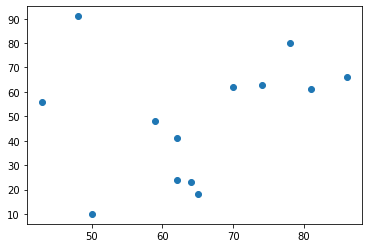

In [81]:
show_optimism_energy_relationship(REGISTROS)

La salida de la celda de test debería ser la siguiente:

<img src="./img/test.png" alt="Drawing" style="width:8cm;"/>